In [5]:
# Importar librerías para tratamiento de datos
import pickle
import numpy as np
import matplotlib.pyplot as plt
from plotnine.data import mpg
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *

In [6]:
# Importar Keras y librerías adicionales de sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [7]:
#Cargar DataSet 
#from google.colab import drive
#drive.mount('/content/drive')


In [8]:
!ls
# Cargando data 
data = pd.read_csv('https://raw.githubusercontent.com/niwdehu/ProyectoFinal_INF648/main/DataSets/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()


sample_data


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
#Agregando columna IMC = Peso/Altura^2
data.isnull().sum()
#peso (kg) / [estatura (m)]2
data["IMC"]= data["Weight"]/(data["Height"]*data["Height"])


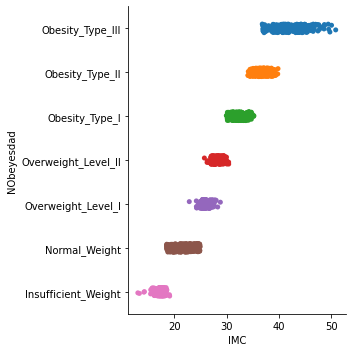

In [10]:
#Evaluando Variable IMC 
data["NObeyesdad"].unique()
order = ['Obesity_Type_III','Obesity_Type_II','Obesity_Type_I','Overweight_Level_II','Overweight_Level_I','Normal_Weight','Insufficient_Weight']
sns.catplot(x="IMC", y="NObeyesdad", data=data,order=order, height=5)

In [11]:
#creamos el IMC como una dataset adicional y separamos X e y
X_data = data.drop("NObeyesdad",axis=1)
IMC_data = pd.DataFrame(data["IMC"])
X_data = X_data.drop("IMC",axis=1)
y_data = pd.DataFrame(data["NObeyesdad"])
print(X_data.shape)
print(y_data.shape)

(2111, 16)
(2111, 1)


In [12]:
#Se crea un método para transformar los datos categóricos a numéricos
#Metodo que retorna el dataset convertido basado en preprocesDataset caso TITANIC del CURSO
def fillColumnaCategorica(dataset):
  datacopy = dataset.copy()

  #REMOVER COLUMNA DURACION HEIGHT and WEIGHT
  
  datacopy = datacopy.drop("Height", axis=1)
  datacopy = datacopy.drop("Weight", axis=1)
  
  
    #Determinamos que variables son del tipo númerico y cuales son categóricas
  numeric_columns = list()
  categorical_columns = list()
  dictionary_of_columns_with_index_to_categorical = dict()
  dictionary_of_columns_with_categorical_to_index = dict()

  for column in datacopy:
    #Determinamos si la variable es numérica o no
    if pd.api.types.is_numeric_dtype(datacopy[column]):
      numeric_columns.append(column)
    else:
      #Modificamos el tipo de dato de la variable mediante "astype"
      datacopy[column] = datacopy[column].astype("category")

      #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
      if not pd.api.types.is_categorical_dtype(datacopy[column]):
        raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

      dictionary_of_columns_with_index_to_categorical[column] = dict()
      dictionary_of_columns_with_categorical_to_index[column] = dict()
      
      #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
      for index, category in enumerate(datacopy[column].cat.categories):
        dictionary_of_columns_with_index_to_categorical[column][index] = category
        dictionary_of_columns_with_categorical_to_index[column][category] = index
      
      categorical_columns.append(column)

  #Transformamos a números los valores (categorías) de las variables categóricas sin considerar los nulos
  datacopy.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

  print("COLUMNAS NUMERICAS", numeric_columns)
  print("COLUMNAS CATEGORICAS",categorical_columns)
  print("DICCIONARIOS DE VALORES ")
  print(dictionary_of_columns_with_index_to_categorical)
  print(dictionary_of_columns_with_categorical_to_index)
  

 
  return datacopy

In [13]:
#Transformamos los datos de "X" a valores numéricos categóricos
preprocess_X_data = fillColumnaCategorica(X_data)
#Guardamos nuestro dataset pre-procesado en formato pickle
preprocess_X_data.to_pickle("preprocess_data.pkl")
preprocess_X_data


COLUMNAS NUMERICAS ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
COLUMNAS CATEGORICAS ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
DICCIONARIOS DE VALORES 
{'Gender': {0: 'Female', 1: 'Male'}, 'family_history_with_overweight': {0: 'no', 1: 'yes'}, 'FAVC': {0: 'no', 1: 'yes'}, 'CAEC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'SMOKE': {0: 'no', 1: 'yes'}, 'SCC': {0: 'no', 1: 'yes'}, 'CALC': {0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}, 'MTRANS': {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}}
{'Gender': {'Female': 0, 'Male': 1}, 'family_history_with_overweight': {'no': 0, 'yes': 1}, 'FAVC': {'no': 0, 'yes': 1}, 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'SMOKE': {'no': 0, 'yes': 1}, 'SCC': {'no': 0, 'yes': 1}, 'CALC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'MTRANS': {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation':

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [14]:
#Transformamos los datos de "y" a valores numéricos categóricos ordinales
from sklearn.preprocessing import OrdinalEncoder
niveles = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III' ]
enc_niveles = OrdinalEncoder(categories=[niveles])
enc_niveles.fit(y_data[["NObeyesdad"]])
preprocess_y_data=pd.DataFrame(enc_niveles.transform(y_data[["NObeyesdad"]]))
preprocess_y_data.columns = ['NObeyesdad']
preprocess_y_data.head()

,NObeyesdad
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0


In [15]:
#Mediante el método "train_test_split" separamos la data de entrenamiento y test, usaremos el 20% de la data para entrenar el modelo.
from sklearn.model_selection import train_test_split
X = preprocess_X_data
y = preprocess_y_data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=21)

In [16]:
#Escalamos los datos a entrenar de tal manera que lu distribución tenga un valor promedio 0 y una desviación estándar de 1
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train_scaled = sc_X.fit_transform(X_train)

In [17]:
# transformamos la variable "y" en una vector de 7 dimensiones, para poderla utilizar en una red neuronal
from keras.utils import np_utils
dummy_y = np_utils.to_categorical(y_train)
dummy_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:

# Inicializar la Red Neuronal Artificial (RNA)
classifier = Sequential()

# La probabilidad de 0.1% es para seleccionar neuronas de una capa sean ignoradas durante el entrenamiento.
p = 0.000

# Se agregan las capas de entrada y primera capa oculta
classifier.add(Dense(units = 20, kernel_initializer = "random_normal",  
                     activation = "relu", input_dim = 14))
classifier.add(Dropout(p))

# Se agrega la segunda capa oculta
classifier.add(Dense(units = 15, kernel_initializer = "uniform",  activation = "relu"))
classifier.add(Dropout(p))

# Se agrega la tercera capa oculta
classifier.add(Dense(units = 30, kernel_initializer = "uniform",  activation = "relu"))
classifier.add(Dropout(p))

# Se agrega la cuarta capa oculta
classifier.add(Dense(units = 10, kernel_initializer = "uniform",  activation = "relu"))
classifier.add(Dropout(p))

# Se agrega la capa de salida
classifier.add(Dense(units = 7, kernel_initializer = "uniform",  activation = "softmax"))

# Se compila la RNA
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


In [19]:
# Ajustamos la RNA al Conjunto de Entrenamiento y la entrenamos
log = classifier.fit(x_train_scaled, dummy_y,  batch_size = 10, epochs = 1000)

Epoch 1/1000
169/169 [==============================] - 1s 2ms/step - loss: 1.9156 - accuracy: 0.1925
Epoch 2/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.5897 - accuracy: 0.2992
Epoch 3/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.4915 - accuracy: 0.4443
Epoch 4/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.4306 - accuracy: 0.4597
Epoch 5/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.3578 - accuracy: 0.5095
Epoch 6/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.2935 - accuracy: 0.5521
Epoch 7/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.2433 - accuracy: 0.5658
Epoch 8/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.2074 - accuracy: 0.5658
Epoch 9/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.1740 - accuracy: 0.5865
Epoch 10/1000
169/169 [==============================] - 0s 2ms/step - loss: 1.147

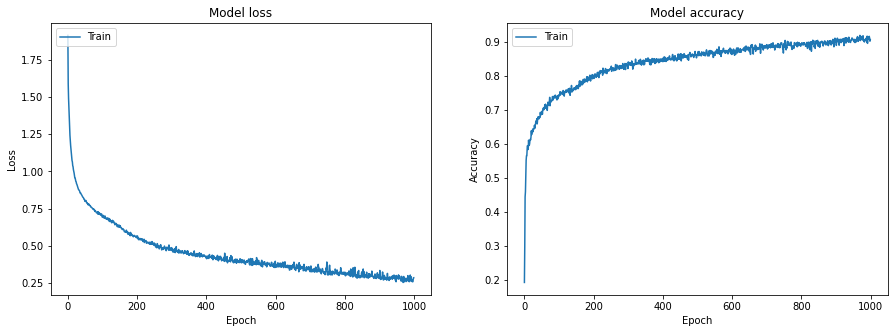

In [23]:
# Adaptado de: https://keras.io/visualization/

plt.figure(figsize=(15,5))
plt.tight_layout()

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(log.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(log.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [25]:
#obtenemos las predicciones de los datos test 
sc_X = StandardScaler()
x_test_scaled = sc_X.fit_transform(X_test)
y_pred  = classifier.predict(x_test_scaled)

#y_test, y_pred
y_test_dummy = np_utils.to_categorical(y_test)
y_pred_dummy = np.vectorize(lambda x: int(x >= 0.5))(y_pred)

In [26]:
#Calculamos las métricas de evaluación del modelo clasificador con RNA
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test_dummy.argmax(axis=1), y_pred_dummy.argmax(axis=1))
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print('Model Performance')
print('Accuracy = {:0.4f}%.'.format(metrics.accuracy_score(y_test_dummy, y_pred_dummy)))
print('Recall = {:0.4f}%.'.format(np.mean(recall)))
print('Precision = {:0.4f}%.'.format(np.mean(precision)))
print('Matrix confussion')
cm

Model Performance
Accuracy = 0.7305%.
Recall = 0.7133%.
Precision = 0.7211%.
Matrix confussion


array([[54,  7,  2,  1,  1,  0,  0],
       [13, 26,  5,  2,  3,  3,  0],
       [ 3, 10, 32,  2,  5,  1,  0],
       [ 8,  2,  1, 32,  8,  4,  0],
       [ 5,  3,  7,  5, 38,  1,  0],
       [ 0,  0,  1,  3,  5, 55,  0],
       [ 2,  0,  0,  0,  0,  0, 73]])